# Molecular Biology (Promoter Gene Sequences)

### Import All Required Libraries

In [1]:
# load libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

### Import dataset

In [2]:
names = ['Class', 'id', 'Sequence']
data=pd.read_csv('promoters.data',delimiter=',',names=names)

In [3]:
#View First 5 rows of the data
data.head()

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


### Pre Processing the data

The data is not in a usable form; as a result, we will need to process it before using it to train our algorithms.

In [122]:
data.head()

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


In [5]:
# Building our Dataset by creating a custom Pandas DataFrame
# Each column in a DataFrame is called a Series. Lets start by making a series for each column.

classes = data.loc[:, 'Class']
print(classes[:5])


0    +
1    +
2    +
3    +
4    +
Name: Class, dtype: object


In [6]:
# generate list of DNA sequences
import sys
sequences = list(data.loc[:, 'Sequence'])
dataset = {}

# loop through sequences and split into individual nucleotides
for i, seq in enumerate(sequences):
    
    # split into nucleotides, remove tab characters
    nucleotides = list(seq)
    nucleotides = [x for x in nucleotides if x != '\t']
    
    # append class assignment
    nucleotides.append(classes[i])
    
    # add to dataset
    dataset[i] = nucleotides
    
print(dataset[0])

['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']


In [7]:
# turn dataset into pandas DataFrame
dframe = pd.DataFrame(dataset)
print(dframe)

   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17   \
0    t   t   g   a   t   a   c   t   c   t   g   c   g   c   t   a   a   a   
1    a   g   t   a   c   g   a   t   g   t   c   c   a   t   t   a   t   a   
2    c   c   a   t   g   g   g   t   a   t   a   t   t   g   t   g   g   a   
3    t   t   c   t   a   g   g   c   c   t   a   g   c   c   a   c   c   c   
4    a   a   t   g   t   g   g   t   t   a   a   a   a   a   t   a   a   a   
5    g   t   a   t   a   c   g   a   t   a   a   a   a   a   a   a   t   a   
6    c   c   g   g   a   a   g   c   a   a   a   a   a   t   t   a   t   t   
7    a   c   a   a   t   a   t   a   a   t   t   t   a   t   t   g   t   t   
8    a   t   g   t   t   g   g   a   t   t   a   t   a   t   t   a   t   t   
9    t   g   a   g   a   g   g   a   a   t   a   c   a   t   t   a   t   c   
10   a   a   a   t   a   a   a   a   t   c   a   a   a   t   t   a   c   a   
11   c   c   c   g   c   g   g   c   a   c   t   g   t   c   c  

In [8]:
# transpose the DataFrame
df = dframe.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,a,c,g,c,t,t,g,c,g,t,t,c,g,g,t,g,g,t,t,a,a,g,t,a,t,g,t,a,t,a,a,t,g,c,g,c,g,g,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,a,c,a,g,t,t,g,t,c,a,c,g,c,t,g,a,t,t,g,g,t,g,t,c,g,t,t,a,c,a,a,t,c,t,a,a,c,g,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,a,c,t,a,g,t,g,c,a,t,t,a,g,c,t,t,a,t,t,t,t,t,t,t,g,t,t,a,t,c,a,t,g,c,t,a,a,c,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,t,g,t,a,t,c,g,a,a,g,t,g,t,g,t,t,g,c,g,g,a,g,t,a,g,a,t,g,t,t,a,g,a,a,t,a,c,t,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,a,c,t,a,t,t,g,a,c,g,a,a,a,a,g,c,t,g,a,a,a,a,c,c,a,c,t,a,g,a,a,t,g,c,g,c,c,t,c,c,g,t,g,g,t,a,g,+


In [144]:
# for clarity, lets rename the last dataframe column to class
df.rename(columns = {57: 'Class'}, inplace = True) 
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,a,c,g,c,t,t,g,c,g,t,t,c,g,g,t,g,g,t,t,a,a,g,t,a,t,g,t,a,t,a,a,t,g,c,g,c,g,g,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,a,c,a,g,t,t,g,t,c,a,c,g,c,t,g,a,t,t,g,g,t,g,t,c,g,t,t,a,c,a,a,t,c,t,a,a,c,g,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,a,c,t,a,g,t,g,c,a,t,t,a,g,c,t,t,a,t,t,t,t,t,t,t,g,t,t,a,t,c,a,t,g,c,t,a,a,c,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,t,g,t,a,t,c,g,a,a,g,t,g,t,g,t,t,g,c,g,g,a,g,t,a,g,a,t,g,t,t,a,g,a,a,t,a,c,t,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,a,c,t,a,t,t,g,a,c,g,a,a,a,a,g,c,t,g,a,a,a,a,c,c,a,c,t,a,g,a,a,t,g,c,g,c,c,t,c,c,g,t,g,g,t,a,g,+


In [9]:
df.columns = ['p-50','p-49','p-48','p-47','p-46','p-45','p-44','p-43','p-42','p-41','p-40','p-39','p-38','p-37','p-36','p-35',
              'p-34','p-33','p-32','p-31','p-30','p-29','p-28','p-27','p-26','p-25','p-24','p-23','p-22','p-21','p-21','p-19',
             'p-18','p-17','p-16','p-15','p-14','p-13','p-12','p-11','p-10','p-9','p-8','p-7','p-6','p-5','p-4','p-3','p-2',
             'p-1','p1','p2','p3','p4','p5','p6','p7','Class']

In [10]:
df.head()

,p-50,p-49,p-48,p-47,p-46,p-45,p-44,p-43,p-42,p-41,p-40,p-39,p-38,p-37,p-36,p-35,p-34,p-33,p-32,p-31,p-30,p-29,p-28,p-27,p-26,p-25,p-24,p-23,p-22,p-21,p-21,p-19,p-18,p-17,p-16,p-15,p-14,p-13,p-12,p-11,p-10,p-9,p-8,p-7,p-6,p-5,p-4,p-3,p-2,p-1,p1,p2,p3,p4,p5,p6,p7,Class
0,t,a,c,t,a,g,c,a,a,t,a,c,g,c,t,t,g,c,g,t,t,c,g,g,t,g,g,t,t,a,a,g,t,a,t,g,t,a,t,a,a,t,g,c,g,c,g,g,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,a,c,a,g,t,t,g,t,c,a,c,g,c,t,g,a,t,t,g,g,t,g,t,c,g,t,t,a,c,a,a,t,c,t,a,a,c,g,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,a,c,t,a,g,t,g,c,a,t,t,a,g,c,t,t,a,t,t,t,t,t,t,t,g,t,t,a,t,c,a,t,g,c,t,a,a,c,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,t,g,t,a,t,c,g,a,a,g,t,g,t,g,t,t,g,c,g,g,a,g,t,a,g,a,t,g,t,t,a,g,a,a,t,a,c,t,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,a,c,t,a,t,t,g,a,c,g,a,a,a,a,g,c,t,g,a,a,a,a,c,c,a,c,t,a,g,a,a,t,g,c,g,c,c,t,c,c,g,t,g,g,t,a,g,+


In [11]:
#The number of Rows and columns
df.shape

(106, 58)

In [11]:
df.head()

,p-50,p-49,p-48,p-47,p-46,p-45,p-44,p-43,p-42,p-41,p-40,p-39,p-38,p-37,p-36,p-35,p-34,p-33,p-32,p-31,p-30,p-29,p-28,p-27,p-26,p-25,p-24,p-23,p-22,p-21,p-21,p-19,p-18,p-17,p-16,p-15,p-14,p-13,p-12,p-11,p-10,p-9,p-8,p-7,p-6,p-5,p-4,p-3,p-2,p-1,p1,p2,p3,p4,p5,p6,p7,Class
0,t,a,c,t,a,g,c,a,a,t,a,c,g,c,t,t,g,c,g,t,t,c,g,g,t,g,g,t,t,a,a,g,t,a,t,g,t,a,t,a,a,t,g,c,g,c,g,g,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,a,c,a,g,t,t,g,t,c,a,c,g,c,t,g,a,t,t,g,g,t,g,t,c,g,t,t,a,c,a,a,t,c,t,a,a,c,g,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,a,c,t,a,g,t,g,c,a,t,t,a,g,c,t,t,a,t,t,t,t,t,t,t,g,t,t,a,t,c,a,t,g,c,t,a,a,c,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,t,g,t,a,t,c,g,a,a,g,t,g,t,g,t,t,g,c,g,g,a,g,t,a,g,a,t,g,t,t,a,g,a,a,t,a,c,t,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,a,c,t,a,t,t,g,a,c,g,a,a,a,a,g,c,t,g,a,a,a,a,c,c,a,c,t,a,g,a,a,t,g,c,g,c,c,t,c,c,g,t,g,g,t,a,g,+


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 105
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   p-50    106 non-null    object
 1   p-49    106 non-null    object
 2   p-48    106 non-null    object
 3   p-47    106 non-null    object
 4   p-46    106 non-null    object
 5   p-45    106 non-null    object
 6   p-44    106 non-null    object
 7   p-43    106 non-null    object
 8   p-42    106 non-null    object
 9   p-41    106 non-null    object
 10  p-40    106 non-null    object
 11  p-39    106 non-null    object
 12  p-38    106 non-null    object
 13  p-37    106 non-null    object
 14  p-36    106 non-null    object
 15  p-35    106 non-null    object
 16  p-34    106 non-null    object
 17  p-33    106 non-null    object
 18  p-32    106 non-null    object
 19  p-31    106 non-null    object
 20  p-30    106 non-null    object
 21  p-29    106 non-null    object
 22  p-28    106 non-null    ob

In [13]:
#To describe object type features of train data
df.describe(include=['object'])

,p-50,p-49,p-48,p-47,p-46,p-45,p-44,p-43,p-42,p-41,p-40,p-39,p-38,p-37,p-36,p-35,p-34,p-33,p-32,p-31,p-30,p-29,p-28,p-27,p-26,p-25,p-24,p-23,p-22,p-21,p-21,p-19,p-18,p-17,p-16,p-15,p-14,p-13,p-12,p-11,p-10,p-9,p-8,p-7,p-6,p-5,p-4,p-3,p-2,p-1,p1,p2,p3,p4,p5,p6,p7,Class
count,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,a,c,t,c,t,t,g,a,c,a,t,a,g,t,t,g,g,t,t,a,a,a,t,t,a,t,t,t,t,a,a,t,t,t,g,c,c,c,c,c,c,t,t,c,c,t,t,-
freq,38,34,30,30,36,42,38,34,33,36,38,31,34,38,54,54,53,40,44,31,34,31,30,32,32,34,29,32,35,35,37,31,41,39,27,34,43,32,35,45,41,33,42,36,34,35,31,32,36,42,31,33,35,32,29,29,34,53


In [12]:
 #observe the target variable
df.groupby('Class').size() 

Class
+    53
-    53
dtype: int64

In [13]:
#Finding missing values
df.isnull().sum()

p-50     0
p-49     0
p-48     0
p-47     0
p-46     0
p-45     0
p-44     0
p-43     0
p-42     0
p-41     0
p-40     0
p-39     0
p-38     0
p-37     0
p-36     0
p-35     0
p-34     0
p-33     0
p-32     0
p-31     0
p-30     0
p-29     0
p-28     0
p-27     0
p-26     0
p-25     0
p-24     0
p-23     0
p-22     0
p-21     0
p-21     0
p-19     0
p-18     0
p-17     0
p-16     0
p-15     0
p-14     0
p-13     0
p-12     0
p-11     0
p-10     0
p-9      0
p-8      0
p-7      0
p-6      0
p-5      0
p-4      0
p-3      0
p-2      0
p-1      0
p1       0
p2       0
p3       0
p4       0
p5       0
p6       0
p7       0
Class    0
dtype: int64

<AxesSubplot:>

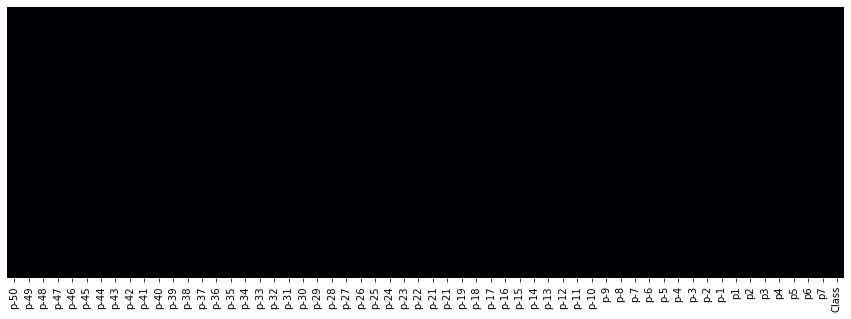

In [14]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cbar = False, yticklabels=False, cmap="inferno" )

In [18]:
#finding outliers
#Since all the data is categorical data then there are no outliers

In [15]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


# EDA

[Text(0, 0, 'a'), Text(1, 0, 't'), Text(2, 0, 'g'), Text(3, 0, 'c')]

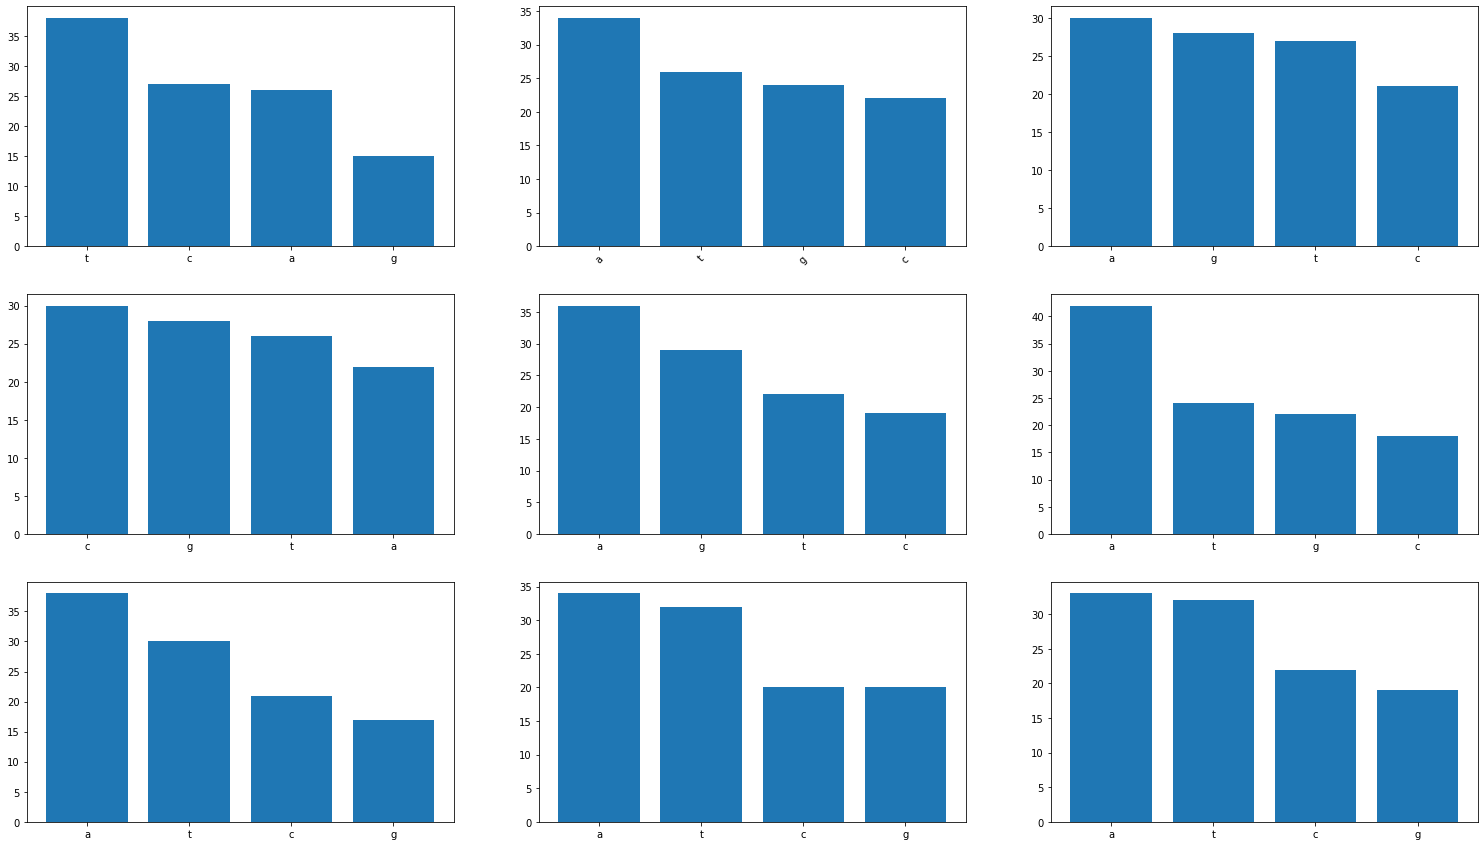

In [15]:
fig, ax=plt.subplots(3,3,figsize=(26,15))
ax[0,0].bar(df['p-50'].value_counts().index,df['p-50'].value_counts())
ax[0,1].bar(df['p-49'].value_counts().index,df['p-49'].value_counts())
ax[0,2].bar(df['p-48'].value_counts().index,df['p-48'].value_counts())
ax[1,0].bar(df['p-47'].value_counts().index,df['p-47'].value_counts())
ax[1,1].bar(df['p-46'].value_counts().index,df['p-46'].value_counts())
ax[1,2].bar(df['p-45'].value_counts().index,df['p-45'].value_counts())
ax[2,0].bar(df['p-44'].value_counts().index,df['p-44'].value_counts())
ax[2,1].bar(df['p-43'].value_counts().index,df['p-43'].value_counts())
ax[2,2].bar(df['p-42'].value_counts().index,df['p-42'].value_counts())

plt.draw()
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)

[Text(0, 0, 'a'), Text(1, 0, 't'), Text(2, 0, 'c'), Text(3, 0, 'g')]

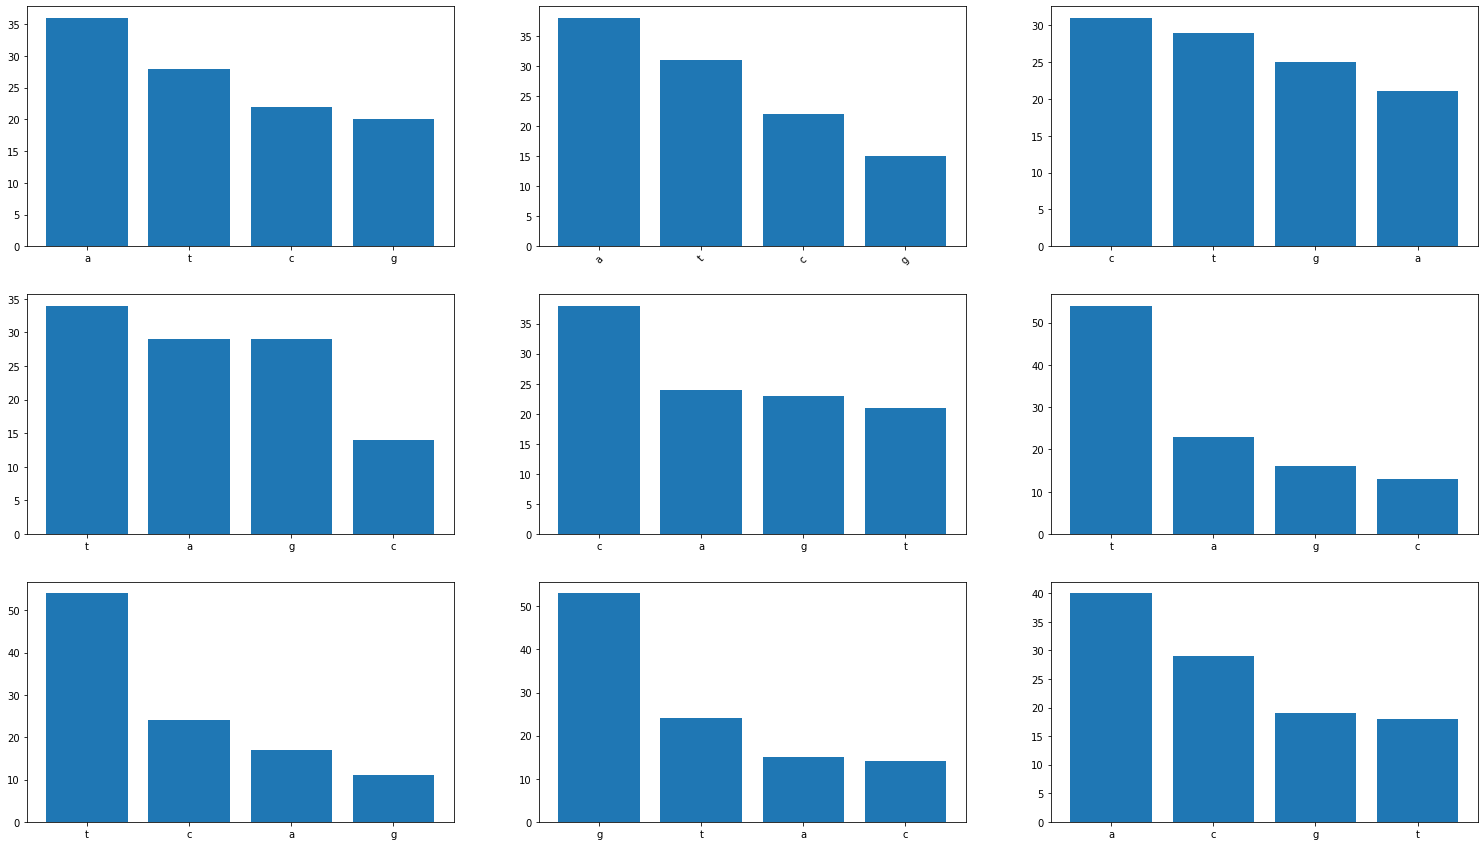

In [22]:
fig, ax=plt.subplots(3,3,figsize=(26,15))
ax[0,0].bar(df['p-41'].value_counts().index,df['p-41'].value_counts())
ax[0,1].bar(df['p-40'].value_counts().index,df['p-40'].value_counts())
ax[0,2].bar(df['p-39'].value_counts().index,df['p-39'].value_counts())
ax[1,0].bar(df['p-38'].value_counts().index,df['p-38'].value_counts())
ax[1,1].bar(df['p-37'].value_counts().index,df['p-37'].value_counts())
ax[1,2].bar(df['p-36'].value_counts().index,df['p-36'].value_counts())
ax[2,0].bar(df['p-35'].value_counts().index,df['p-35'].value_counts())
ax[2,1].bar(df['p-34'].value_counts().index,df['p-34'].value_counts())
ax[2,2].bar(df['p-33'].value_counts().index,df['p-33'].value_counts())

plt.draw()
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)

In [16]:
df.head()

,p-50,p-49,p-48,p-47,p-46,p-45,p-44,p-43,p-42,p-41,p-40,p-39,p-38,p-37,p-36,p-35,p-34,p-33,p-32,p-31,p-30,p-29,p-28,p-27,p-26,p-25,p-24,p-23,p-22,p-21,p-21,p-19,p-18,p-17,p-16,p-15,p-14,p-13,p-12,p-11,p-10,p-9,p-8,p-7,p-6,p-5,p-4,p-3,p-2,p-1,p1,p2,p3,p4,p5,p6,p7,Class
0,t,a,c,t,a,g,c,a,a,t,a,c,g,c,t,t,g,c,g,t,t,c,g,g,t,g,g,t,t,a,a,g,t,a,t,g,t,a,t,a,a,t,g,c,g,c,g,g,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,a,c,a,g,t,t,g,t,c,a,c,g,c,t,g,a,t,t,g,g,t,g,t,c,g,t,t,a,c,a,a,t,c,t,a,a,c,g,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,a,c,t,a,g,t,g,c,a,t,t,a,g,c,t,t,a,t,t,t,t,t,t,t,g,t,t,a,t,c,a,t,g,c,t,a,a,c,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,t,g,t,a,t,c,g,a,a,g,t,g,t,g,t,t,g,c,g,g,a,g,t,a,g,a,t,g,t,t,a,g,a,a,t,a,c,t,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,a,c,t,a,t,t,g,a,c,g,a,a,a,a,g,c,t,g,a,a,a,a,c,c,a,c,t,a,g,a,a,t,g,c,g,c,c,t,c,c,g,t,g,g,t,a,g,+


In [17]:
y = df['Class']

In [18]:
y.head()

0    +
1    +
2    +
3    +
4    +
Name: Class, dtype: object

In [19]:
y.replace(to_replace ="+", 
                 value =1, inplace=True)

In [20]:
y.replace(to_replace ="-", 
                 value =0, inplace=True)

In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [22]:
df.head()

,p-50,p-49,p-48,p-47,p-46,p-45,p-44,p-43,p-42,p-41,p-40,p-39,p-38,p-37,p-36,p-35,p-34,p-33,p-32,p-31,p-30,p-29,p-28,p-27,p-26,p-25,p-24,p-23,p-22,p-21,p-21,p-19,p-18,p-17,p-16,p-15,p-14,p-13,p-12,p-11,p-10,p-9,p-8,p-7,p-6,p-5,p-4,p-3,p-2,p-1,p1,p2,p3,p4,p5,p6,p7,Class
0,t,a,c,t,a,g,c,a,a,t,a,c,g,c,t,t,g,c,g,t,t,c,g,g,t,g,g,t,t,a,a,g,t,a,t,g,t,a,t,a,a,t,g,c,g,c,g,g,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,a,c,a,g,t,t,g,t,c,a,c,g,c,t,g,a,t,t,g,g,t,g,t,c,g,t,t,a,c,a,a,t,c,t,a,a,c,g,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,a,c,t,a,g,t,g,c,a,t,t,a,g,c,t,t,a,t,t,t,t,t,t,t,g,t,t,a,t,c,a,t,g,c,t,a,a,c,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,t,g,t,a,t,c,g,a,a,g,t,g,t,g,t,t,g,c,g,g,a,g,t,a,g,a,t,g,t,t,a,g,a,a,t,a,c,t,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,a,c,t,a,t,t,g,a,c,g,a,a,a,a,g,c,t,g,a,a,a,a,c,c,a,c,t,a,g,a,a,t,g,c,g,c,c,t,c,c,g,t,g,g,t,a,g,+


In [22]:
df = df.drop(columns=['Class'])

In [23]:
# we can't run machine learning algorithms on the data in 'String' formats. As a result, we need to switch
# it to numerical data. This can easily be accomplished using the pd.get_dummies() function
#numerical_df = pd.get_dummies(df)
numerical_df=pd.get_dummies(df,drop_first=True)
numerical_df.head()

,p-50_c,p-50_g,p-50_t,p-49_c,p-49_g,p-49_t,p-48_c,p-48_g,p-48_t,p-47_c,p-47_g,p-47_t,p-46_c,p-46_g,p-46_t,p-45_c,p-45_g,p-45_t,p-44_c,p-44_g,p-44_t,p-43_c,p-43_g,p-43_t,p-42_c,p-42_g,p-42_t,p-41_c,p-41_g,p-41_t,p-40_c,p-40_g,p-40_t,p-39_c,p-39_g,p-39_t,p-38_c,p-38_g,p-38_t,p-37_c,p-37_g,p-37_t,p-36_c,p-36_g,p-36_t,p-35_c,p-35_g,p-35_t,p-34_c,p-34_g,p-34_t,p-33_c,p-33_g,p-33_t,p-32_c,p-32_g,p-32_t,p-31_c,p-31_g,p-31_t,p-30_c,p-30_g,p-30_t,p-29_c,p-29_g,p-29_t,p-28_c,p-28_g,p-28_t,p-27_c,p-27_g,p-27_t,p-26_c,p-26_g,p-26_t,p-25_c,p-25_g,p-25_t,p-24_c,p-24_g,p-24_t,p-23_c,p-23_g,p-23_t,p-22_c,p-22_g,p-22_t,p-21_c,p-21_g,p-21_t,p-21_c,p-21_g,p-21_t,p-19_c,p-19_g,p-19_t,p-18_c,p-18_g,p-18_t,p-17_c,p-17_g,p-17_t,p-16_c,p-16_g,p-16_t,p-15_c,p-15_g,p-15_t,p-14_c,p-14_g,p-14_t,p-13_c,p-13_g,p-13_t,p-12_c,p-12_g,p-12_t,p-11_c,p-11_g,p-11_t,p-10_c,p-10_g,p-10_t,p-9_c,p-9_g,p-9_t,p-8_c,p-8_g,p-8_t,p-7_c,p-7_g,p-7_t,p-6_c,p-6_g,p-6_t,p-5_c,p-5_g,p-5_t,p-4_c,p-4_g,p-4_t,p-3_c,p-3_g,p-3_t,p-2_c,p-2_g,p-2_t,p-1_c,p-1_g,p-1_t,p1_c,p1_g,p1_t,p2_c,p2_g,p2_t,p3_c,p3_g,p3_t,p4_c,p4_g,p4_t,p5_c,p5_g,p5_t,p6_c,p6_g,p6_t,p7_c,p7_g,p7_t
0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1
1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
4,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0


In [24]:
numerical_df.shape

(106, 171)

In [94]:
# We don't need both class columns.  Lets drop one then rename the other to simply 'Class'.
#df = numerical_df.drop(columns=['Class_-'])

#df.rename(columns = {'Class_+': 'Class'}, inplace = True)
#df.shape

(106, 229)

In [25]:
X=numerical_df

### separate training and testing datasets

In [26]:
X.head()

,p-50_c,p-50_g,p-50_t,p-49_c,p-49_g,p-49_t,p-48_c,p-48_g,p-48_t,p-47_c,p-47_g,p-47_t,p-46_c,p-46_g,p-46_t,p-45_c,p-45_g,p-45_t,p-44_c,p-44_g,p-44_t,p-43_c,p-43_g,p-43_t,p-42_c,p-42_g,p-42_t,p-41_c,p-41_g,p-41_t,p-40_c,p-40_g,p-40_t,p-39_c,p-39_g,p-39_t,p-38_c,p-38_g,p-38_t,p-37_c,p-37_g,p-37_t,p-36_c,p-36_g,p-36_t,p-35_c,p-35_g,p-35_t,p-34_c,p-34_g,p-34_t,p-33_c,p-33_g,p-33_t,p-32_c,p-32_g,p-32_t,p-31_c,p-31_g,p-31_t,p-30_c,p-30_g,p-30_t,p-29_c,p-29_g,p-29_t,p-28_c,p-28_g,p-28_t,p-27_c,p-27_g,p-27_t,p-26_c,p-26_g,p-26_t,p-25_c,p-25_g,p-25_t,p-24_c,p-24_g,p-24_t,p-23_c,p-23_g,p-23_t,p-22_c,p-22_g,p-22_t,p-21_c,p-21_g,p-21_t,p-21_c,p-21_g,p-21_t,p-19_c,p-19_g,p-19_t,p-18_c,p-18_g,p-18_t,p-17_c,p-17_g,p-17_t,p-16_c,p-16_g,p-16_t,p-15_c,p-15_g,p-15_t,p-14_c,p-14_g,p-14_t,p-13_c,p-13_g,p-13_t,p-12_c,p-12_g,p-12_t,p-11_c,p-11_g,p-11_t,p-10_c,p-10_g,p-10_t,p-9_c,p-9_g,p-9_t,p-8_c,p-8_g,p-8_t,p-7_c,p-7_g,p-7_t,p-6_c,p-6_g,p-6_t,p-5_c,p-5_g,p-5_t,p-4_c,p-4_g,p-4_t,p-3_c,p-3_g,p-3_t,p-2_c,p-2_g,p-2_t,p-1_c,p-1_g,p-1_t,p1_c,p1_g,p1_t,p2_c,p2_g,p2_t,p3_c,p3_g,p3_t,p4_c,p4_g,p4_t,p5_c,p5_g,p5_t,p6_c,p6_g,p6_t,p7_c,p7_g,p7_t
0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1
1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
4,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0


In [27]:
from sklearn import model_selection

# Create X and Y datasets for training
#X = df.drop(['Class'], 1)
#y = df['Class']


# split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=10)

In [29]:
X.head()

,p-50_c,p-50_g,p-50_t,p-49_c,p-49_g,p-49_t,p-48_c,p-48_g,p-48_t,p-47_c,p-47_g,p-47_t,p-46_c,p-46_g,p-46_t,p-45_c,p-45_g,p-45_t,p-44_c,p-44_g,p-44_t,p-43_c,p-43_g,p-43_t,p-42_c,p-42_g,p-42_t,p-41_c,p-41_g,p-41_t,p-40_c,p-40_g,p-40_t,p-39_c,p-39_g,p-39_t,p-38_c,p-38_g,p-38_t,p-37_c,p-37_g,p-37_t,p-36_c,p-36_g,p-36_t,p-35_c,p-35_g,p-35_t,p-34_c,p-34_g,p-34_t,p-33_c,p-33_g,p-33_t,p-32_c,p-32_g,p-32_t,p-31_c,p-31_g,p-31_t,p-30_c,p-30_g,p-30_t,p-29_c,p-29_g,p-29_t,p-28_c,p-28_g,p-28_t,p-27_c,p-27_g,p-27_t,p-26_c,p-26_g,p-26_t,p-25_c,p-25_g,p-25_t,p-24_c,p-24_g,p-24_t,p-23_c,p-23_g,p-23_t,p-22_c,p-22_g,p-22_t,p-21_c,p-21_g,p-21_t,p-21_c,p-21_g,p-21_t,p-19_c,p-19_g,p-19_t,p-18_c,p-18_g,p-18_t,p-17_c,p-17_g,p-17_t,p-16_c,p-16_g,p-16_t,p-15_c,p-15_g,p-15_t,p-14_c,p-14_g,p-14_t,p-13_c,p-13_g,p-13_t,p-12_c,p-12_g,p-12_t,p-11_c,p-11_g,p-11_t,p-10_c,p-10_g,p-10_t,p-9_c,p-9_g,p-9_t,p-8_c,p-8_g,p-8_t,p-7_c,p-7_g,p-7_t,p-6_c,p-6_g,p-6_t,p-5_c,p-5_g,p-5_t,p-4_c,p-4_g,p-4_t,p-3_c,p-3_g,p-3_t,p-2_c,p-2_g,p-2_t,p-1_c,p-1_g,p-1_t,p1_c,p1_g,p1_t,p2_c,p2_g,p2_t,p3_c,p3_g,p3_t,p4_c,p4_g,p4_t,p5_c,p5_g,p5_t,p6_c,p6_g,p6_t,p7_c,p7_g,p7_t
0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1
1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
4,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0


In [28]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79, 171)
(27, 171)
(79,)
(27,)


### Training and Testing the Classification Algorithms

### Logistic Regression

In [31]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression()

In [32]:
X_test.shape

(27, 171)

In [33]:
y_pred=logreg.predict(X_test)

In [34]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0],
       [ 0, 14]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

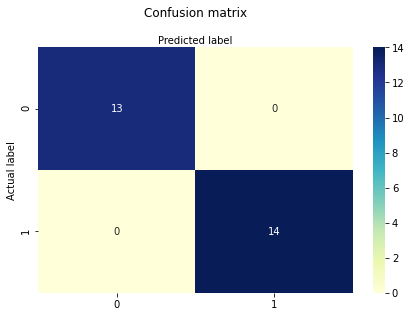

In [35]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


### Logistic regression ROC curve

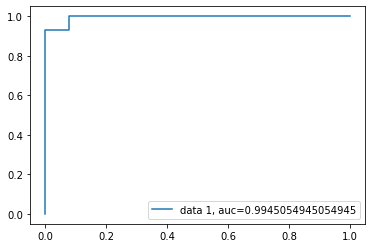

In [34]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt')

In [36]:
y_pred=model.predict(X_test)

In [37]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0],
       [ 1, 13]], dtype=int64)

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9629629629629629
Precision: 1.0
Recall: 0.9285714285714286


### Naive bayes Theorem

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
#fit on training data
gnb.fit(X_train, y_train)

GaussianNB()

In [40]:
y_pred=model.predict(X_test)

In [41]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0],
       [ 1, 13]], dtype=int64)

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9629629629629629
Precision: 1.0
Recall: 0.9285714285714286


### SVM

In [43]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [44]:
y_pred = svclassifier.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[12  1]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.93      1.00      0.97        14

    accuracy                           0.96        27
   macro avg       0.97      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



### Polinomeal Kernal

In [46]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [47]:
y_pred = svclassifier.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0]
 [13  1]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        13
           1       1.00      0.07      0.13        14

    accuracy                           0.52        27
   macro avg       0.75      0.54      0.40        27
weighted avg       0.76      0.52      0.39        27



### Gaussian Kernel

In [49]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC()

In [50]:
y_pred = svclassifier.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.79      0.88        14

    accuracy                           0.89        27
   macro avg       0.91      0.89      0.89        27
weighted avg       0.91      0.89      0.89        27



### Sigmoid Kernel

In [52]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [53]:
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  1]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.93      1.00      0.97        14

    accuracy                           0.96        27
   macro avg       0.97      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



In [37]:
import pickle
#open a file where you want to store your data
file=open('model1.pkl','wb')

#dump information to thet file
pickle.dump(logreg,file)

#pickle.dump(logreg,open('model11.pkl','wb'))  # pickle file is empty

In [38]:
output=logreg.predict([[1,0,1,0,1,1,1,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0]])

#(1,0,1,0,1,1,1,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1)

In [39]:
print(output)

[0]
